# Understanding the Data: From the file `heart-disease.names`

data_path = 'data/heart+disease/processed.cleveland.data'

From the file `heart-disease.names`, the data has 14 attributes and 303 instances. After close examination, of the 14 attributes, 13 are used for prediction and the 14th attribute is the predicted attribute. Of all the attributes, 9 are categorical and 5 are continuous.

### Categorical Attributes
- sex: 1 = male; 0 = female
- cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- exang: exercise induced angina (1 = yes; 0 = no)
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
- num: diagnosis of heart disease (angiographic disease status)


## 1. Load the Dataset

For this task, I'll be using the `processed.cleveland.data` dataset for this analysis. 

In [1]:
import pandas as pd

# load the data
data_path = 'data/heart+disease/processed.cleveland.data'
data = pd.read_csv(data_path, header=None)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

data.columns = columns
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA: Check unique values in Categorical Columns

The reason for doing this is to check if there are any missing values in the categorical columns. That will help in mapping the categorical columns to the correct values and if missing values are found, we can handle them appropriately.

In [2]:
# Get Unique Values in Each Column
def print_unique_values(df, categorical_columns):
    for column in categorical_columns:
        if column in df.columns:
            unique_values = df[column].unique()
            print(f"\n {len(unique_values)} Unique values in '{column}':")
            print(unique_values)
            print("-" * 50)
        else:
            print(f"\nWarning: Column '{column}' not found in the DataFrame")

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print_unique_values(data, categorical_columns)



 2 Unique values in 'sex':
[1. 0.]
--------------------------------------------------

 4 Unique values in 'cp':
[1. 4. 3. 2.]
--------------------------------------------------

 2 Unique values in 'fbs':
[1. 0.]
--------------------------------------------------

 3 Unique values in 'restecg':
[2. 0. 1.]
--------------------------------------------------

 2 Unique values in 'exang':
[0. 1.]
--------------------------------------------------

 3 Unique values in 'slope':
[3. 2. 1.]
--------------------------------------------------

 5 Unique values in 'ca':
['0.0' '3.0' '2.0' '1.0' '?']
--------------------------------------------------

 4 Unique values in 'thal':
['6.0' '3.0' '7.0' '?']
--------------------------------------------------


### Explanation

From the output, we can see that there are missing values in the `ca` and `thal` columns. I will handle these missing values by mapping them to a new category, say `unknown`.

## 2. Data Preprocessing

Converting catergorical integers to actual labels, handling missing data, applying one hot encoding and scaling the data using standard scalar.

In [3]:
# label categorical columns
import numpy as np

sex_map = {1.0: 'male', 0.0: 'female'}
cp_map = {1.0: 'typical angina', 2.0: 'atypical angina', 3.0: 'non-anginal pain', 4.0: 'asymptomatic'}
fbs_map = {1.0: 'true', 0.0: 'false'}
restecg_map = {0.0: 'normal', 1.0: 'abnormal', 2.0: 'left ventricular hypertrophy'}
exang_map = {1.0: 'yes', 0.0: 'no'}
slope_map = {1.0: 'upsloping', 2.0: 'flat', 3.0: 'downsloping'}
ca_map = {'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '?': np.nan}
thal_map = {'3.0': 'normal', '6.0': 'fixed defect', '7.0': 'reversible defect', '?': np.nan}


data['sex'] = data['sex'].map(sex_map)
data['cp'] = data['cp'].map(cp_map)
data['fbs'] = data['fbs'].map(fbs_map)
data['restecg'] = data['restecg'].map(restecg_map)
data['exang'] = data['exang'].map(exang_map)
data['slope'] = data['slope'].map(slope_map)
data['ca'] = data['ca'].map(ca_map)
data['thal'] = data['thal'].map(thal_map)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,typical angina,145.0,233.0,true,left ventricular hypertrophy,150.0,no,2.3,downsloping,0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,false,left ventricular hypertrophy,108.0,yes,1.5,flat,3,normal,2
2,67.0,male,asymptomatic,120.0,229.0,false,left ventricular hypertrophy,129.0,yes,2.6,flat,2,reversible defect,1
3,37.0,male,non-anginal pain,130.0,250.0,false,normal,187.0,no,3.5,downsloping,0,normal,0
4,41.0,female,atypical angina,130.0,204.0,false,left ventricular hypertrophy,172.0,no,1.4,upsloping,0,normal,0


In [4]:
# check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

### Explanation

From the output, we can see that there are missing values in the `ca` and `thal` columns. Given the importance of these columns, I will drop the rows with missing values.

In [5]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
target = data['num']
data.drop(columns=['num'])
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False, dtype=int)
data_encoded.head()


,age,trestbps,chol,thalach,oldpeak,num,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,slope_downsloping,slope_flat,slope_upsloping,ca_0,ca_1,ca_2,ca_3,thal_fixed defect,thal_normal,thal_reversible defect
0,63.0,145.0,233.0,150.0,2.3,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)

print(data_scaled.describe())

                age      trestbps          chol       thalach     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -1.226105e-16  4.904420e-16 -1.958777e-16  4.784800e-16    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688   
min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712   
25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712   
50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822e-01   -0.219520   
75%    7.148067e-01  4.684179e-01  5.519138e-01  7.160957e-01    0.467672   
max    2.485798e+00  3.851964e+00  6.099981e+00  2.287949e+00    4.419026   

                num    sex_female      sex_male  cp_asymptomatic  \
count  2.970000e+02  2.970000e+02  2.970000e+02     2.970000e+02   
mean  -2.242875e-17 -9.569599e-17 -7.177199e-17    -5.980999e-17   
std    1.001688e+00  1.001688e+00  1.001688e+00     1.001688e+00   
min   -7.676679e-01 -6.910947e-01 

In [8]:
print("Shape of the scaled dataset:", data_scaled.shape)
data_scaled.head()


Shape of the scaled dataset: (297, 29)


,age,trestbps,chol,thalach,oldpeak,num,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,slope_downsloping,slope_flat,slope_upsloping,ca_0,ca_1,ca_2,ca_3,thal_fixed defect,thal_normal,thal_reversible defect
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.767668,-0.691095,0.691095,-0.957146,-0.444500,...,3.625308,-0.925338,-0.937948,0.840771,-0.529313,-0.383038,-0.268705,3.937004,-1.110443,-0.794901
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.855089,-0.691095,0.691095,1.044772,-0.444500,...,-0.275839,1.080686,-0.937948,-1.189384,-0.529313,-0.383038,3.721559,-0.254000,0.900542,-0.794901
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.043711,-0.691095,0.691095,1.044772,-0.444500,...,-0.275839,1.080686,-0.937948,-1.189384,-0.529313,2.610707,-0.268705,-0.254000,-1.110443,1.258018
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.767668,-0.691095,0.691095,-0.957146,-0.444500,...,3.625308,-0.925338,-0.937948,0.840771,-0.529313,-0.383038,-0.268705,-0.254000,0.900542,-0.794901
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.767668,1.446980,-1.446980,-0.957146,2.249717,...,-0.275839,-0.925338,1.066157,0.840771,-0.529313,-0.383038,-0.268705,-0.254000,0.900542,-0.794901


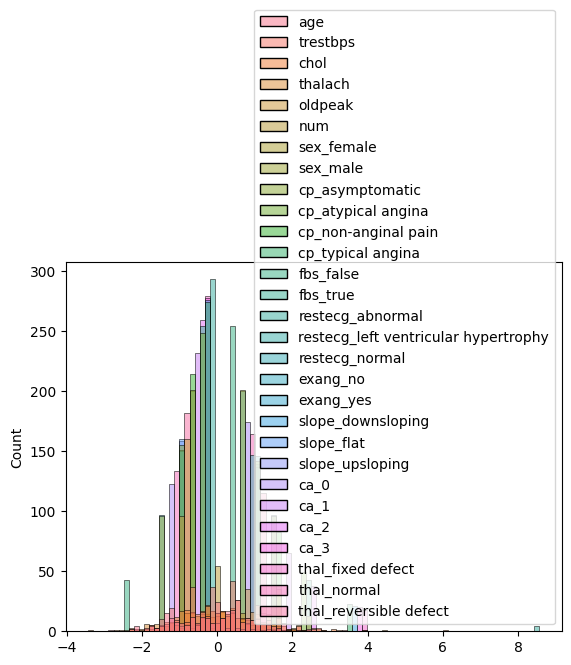

In [9]:
# plot distribution of the scaled dataset 
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_scaled)
plt.show()

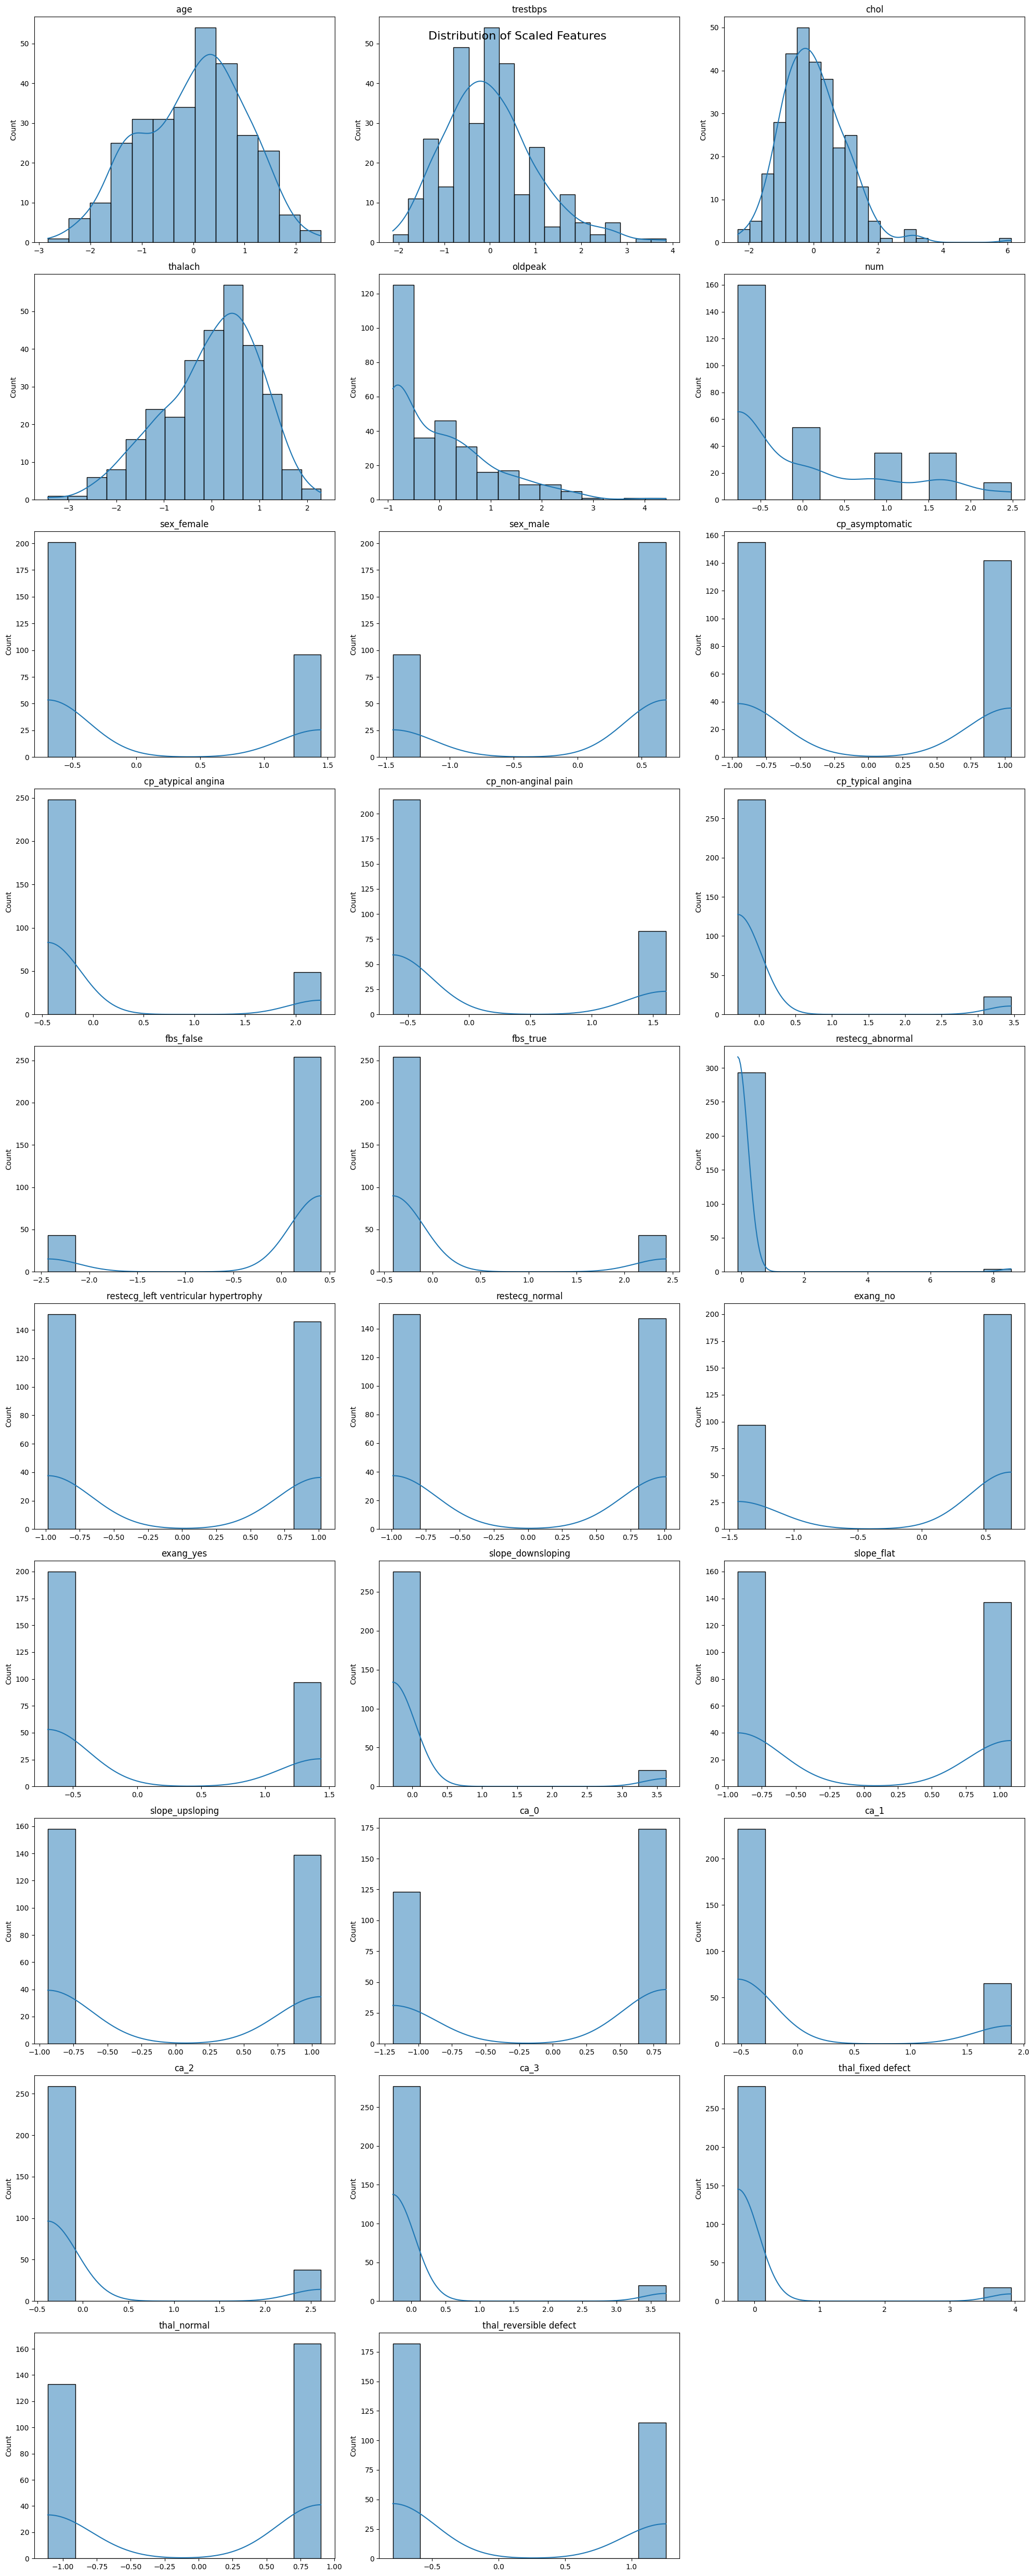

Total number of features plotted: 29


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_features = len(data_scaled.columns)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribution of Scaled Features', fontsize=16)

axes_flat = axes.flatten()
for i, column in enumerate(data_scaled.columns):
    sns.histplot(data=data_scaled, x=column, ax=axes_flat[i], kde=True)
    axes_flat[i].set_title(column)
    axes_flat[i].set_xlabel('')

# Remove any unused subplots
for j in range(n_features, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

print(f"Total number of features plotted: {n_features}")

## 3.a. K-Means Clustering

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

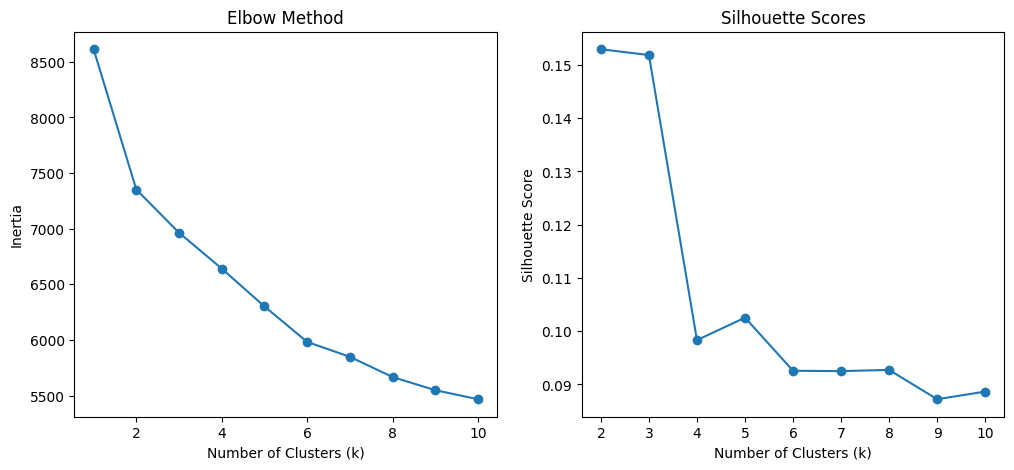

In [14]:
inertia = []
silhouette_scores = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


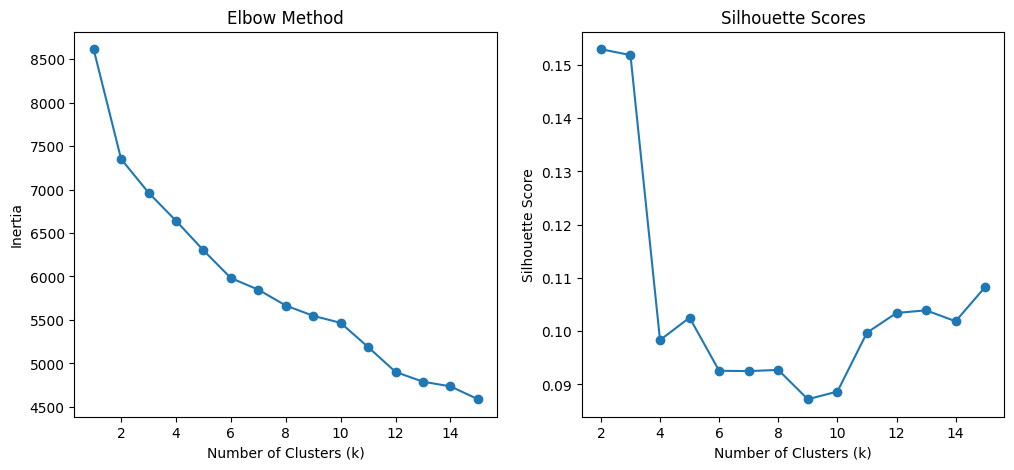

In [15]:
inertia = []
silhouette_scores = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()




The Elbow Method suggests k = 4 as the optimal number of clusters, whereas the Silhouette Scores favor k = 2. For better-defined clusters (higher silhouette score) or more segmentation (higher k), I choose k = 4 as a balanced option, or k = 2 for fewer, more distinct clusters.

In [16]:
# Fit K-Means with optimal k
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

## 3.b. Hierarchical Clustering

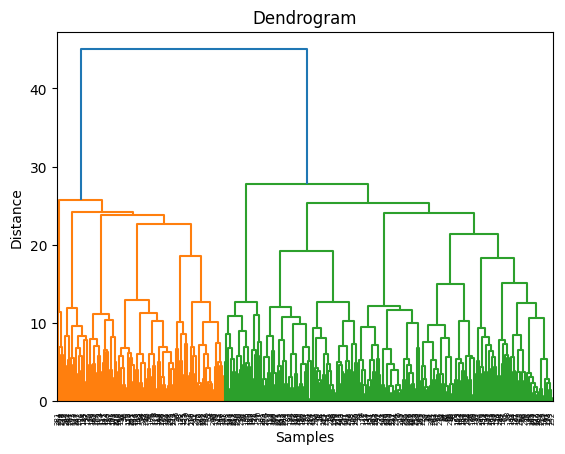

In [17]:
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Understanding the Dendrogram

The dendrogram shows the arrangement of the clusters formed during the agglomerative clustering process. In this plot, the vertical lines represent the merging of clusters, while the height of the vertical lines (distance) indicates how different or similar the merged clusters are. According to the plot, there is a significant merge occurring around a height of ~40 (the largest vertical distance). `This suggests that at this point, two major clusters are formed (green and orange).`

Based on the visual break at height ~40, it seems that there are two main clusters. This aligns with the silhouette score plot, which indicated k = 2 as a good option.

In [83]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

hierarchical_labels

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

## 3.c. DBSCAN Clustering

Density-based spatial clustering of applications with noise (DBSCAN) is a clustering algorithm used in machine learning to partition data into clusters based on their distance to other points. Its effective at identifying and removing noise in a data set, making it useful for data cleaning and outlier detection (Built In, 2024). 

Text(0.5, 0, 'Data Points sorted by distance')

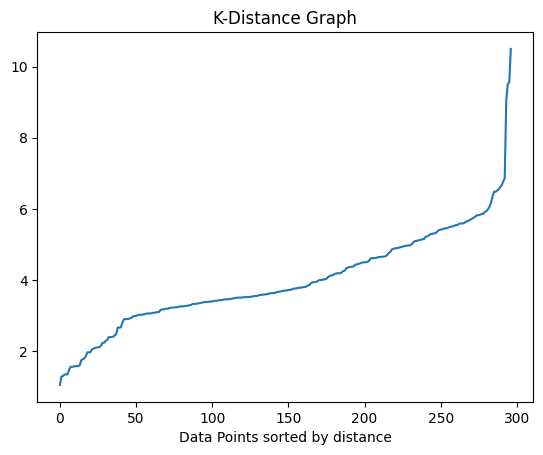

In [28]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors.fit(data_scaled)
distances, indices = neighbors.kneighbors(data_scaled)
distances = np.sort(distances[:, 3], axis=0)

plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')


### Explanation

The K-distance graph helps to determine the best value for the `eps` parameter in DBSCAN. From the graph above the point of maximu, curvature in the graph occurs aroounf the 6-7 mark on the Y-axis. So I'll be using eps = 6

In [72]:
eps = 6
min_samples = 2

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluate the results
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {num_clusters}")

Number of clusters found by DBSCAN: 2


### Explanation

Given that the data is sparse, due to the one hot encoding of categorical data, I realized that DBSCAN struggled to find an optimal number of clusters for min samples != 2, and this boils down to the `curse of dimensionality`. So it is most probable to perform Dimensionality Reduction (PCA).

## 4. Principal Component Analysis

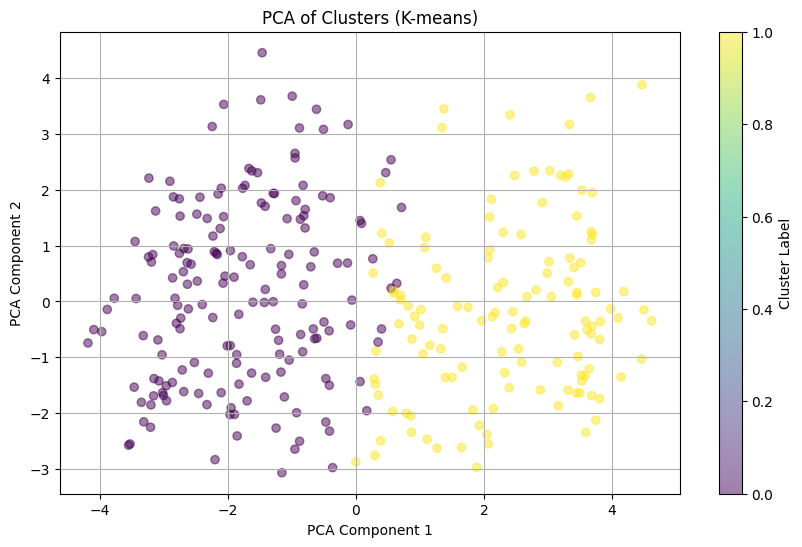

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('PCA of Clusters (K-means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


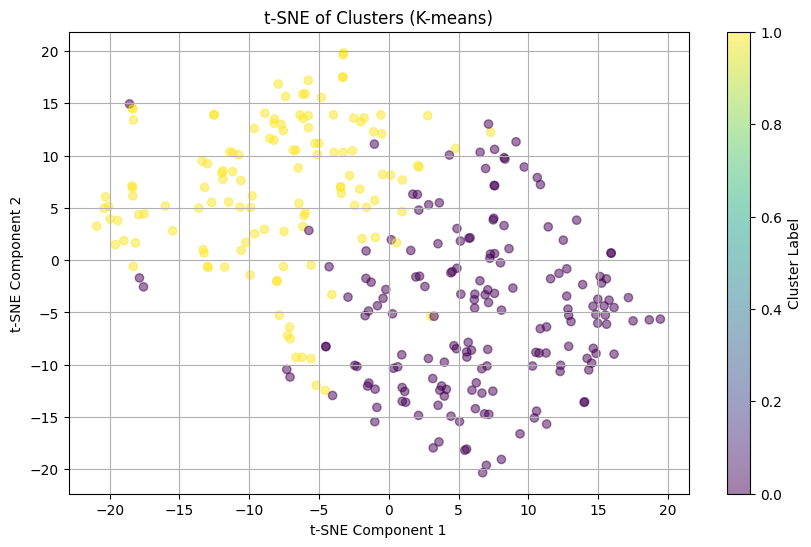

In [74]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE of Clusters (K-means)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

## PCA AND tSNE Conclusion

From my observation of the plots above:

1. `Clear Separation of Clusters`: Both the PCA and t-SNE plots show two distinct clusters, which could represent two groups of patients—likely those with heart disease and those without. The yellow and purple points might indicate these groups as determined by the K-means clustering.

2. `PCA (Principal Component Analysis) Plot:`

- The first two PCA components provide a linear transformation that captures the variance in the dataset. In the PCA plot, the clusters are separated but with some overlap in the middle. This suggests that while there are differences between the two groups, some features may be shared or less distinct between them.
- The spread along the PCA components shows how much variance is captured by each component, with the second PCA component (Y-axis) providing some additional separation.

3. `t-SNE (t-Distributed Stochastic Neighbor Embedding) Plot:`

- The t-SNE plot shows more pronounced separation between the clusters, which is typical because t-SNE is better at preserving local relationships in the high-dimensional space. The clustering appears clearer, with less overlap between the two groups.
- t-SNE is nonlinear and may better capture the underlying structure of the data, revealing more nuanced separations that PCA might not have shown. The tighter grouping within the clusters here suggests that K-means has identified distinct groups based on the features related to heart disease.

4. `Cluster Quality:`

Both plots suggest that the clustering algorithm (K-means) has successfully partitioned the data into two main groups, though PCA indicates some level of potential overlap in certain patients. t-SNE, on the other hand, shows a more distinct separation, indicating that the clusters might be well-defined in the high-dimensional space.

### Interpretation in the Context of Heart Disease:

The clear separation might reflect distinct patterns between patients with and without heart disease. The overlapping points in both plots may indicate patients with borderline or mixed features, suggesting either early-stage disease or non-conventional risk factors.

## 5. Gaussian Mixture Model

In [75]:
from sklearn.mixture import GaussianMixture

n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(data_scaled)

gmm_labels = gmm.predict(data_scaled)

In [82]:
# Get the means of each component
means = gmm.means_
covariances = gmm.covariances_

# Create a DataFrame to summarize the results
gmm_summary = pd.DataFrame(means, columns=data_scaled.columns)
gmm_summary['Cluster'] = np.arange(n_components)

gmm_summary

,age,trestbps,chol,thalach,oldpeak,num,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,slope_flat,slope_upsloping,ca_0,ca_1,ca_2,ca_3,thal_fixed defect,thal_normal,thal_reversible defect,Cluster
0,-0.065579,-0.052666,0.006470,0.102958,-0.085344,-0.107244,0.038171,-0.038171,-0.064818,0.046307,...,-0.077831,0.087408,0.101102,0.033141,0.011486,-0.268705,-0.254000,0.105501,0.016718,0
1,0.433832,0.348403,-0.042804,-0.681107,0.564584,0.709457,-0.252515,0.252515,0.428797,-0.306335,...,0.514885,-0.578237,-0.668831,-0.219242,-0.075987,1.777584,1.680309,-0.697933,-0.110595,1


### Explanation

The GMM has identified two clusters:

### Cluster 0: Potentially Lower Risk Group
- **Age**: Younger individuals, with a slightly below-average age (`-0.065579`).
- **Resting Blood Pressure (trestbps)**: Below-average resting blood pressure (`-0.052666`).
- **Serum Cholesterol (chol)**: Cholesterol levels close to average (`0.006470`).
- **Maximum Heart Rate (thalach)**: Higher maximum heart rate during exercise (`0.102958`), indicating better cardiovascular health.
- **ST Depression (oldpeak)**: Lower ST depression (`-0.085344`), which suggests a lower risk of heart disease.
- **Diagnosis of Heart Disease (num)**: Lower likelihood of having heart disease (`-0.107244`).
- **Gender**: Slightly more females (`sex_female: 0.038171`) than males.
- **Chest Pain**: Lower occurrence of asymptomatic chest pain (`-0.064818`).
- **Slope of ST Segment**: Lesser risk indicated by a lower slope value (`slope_flat: -0.077831`).
- **Blocked Major Vessels (ca_3)**: Fewer blocked vessels, indicative of better heart health (`-0.268705`).

### Cluster 1: Higher Risk Group
- **Age**: Older individuals, with an above-average age (`0.433832`).
- **Resting Blood Pressure (trestbps)**: Elevated resting blood pressure (`0.348403`), a significant heart disease risk factor.
- **Serum Cholesterol (chol)**: Slightly below-average cholesterol (`-0.042804`).
- **Maximum Heart Rate (thalach)**: Lower heart rate during exercise (`-0.681107`), indicating poorer cardiovascular health.
- **ST Depression (oldpeak)**: Higher ST depression (`0.564584`), often associated with heart problems.
- **Diagnosis of Heart Disease (num)**: Higher likelihood of having heart disease (`0.709457`).
- **Gender**: More males in this group (`sex_male: 0.252515`).
- **Chest Pain**: Higher occurrence of asymptomatic chest pain (`0.428797`).
- **Slope of ST Segment**: Higher slope value indicates greater risk (`slope_flat: 0.514885`).
- **Blocked Major Vessels (ca_3)**: More blocked vessels, suggesting more severe heart disease (`1.777584`).

The GMM model successfully identified two clusters in the dataset:

1. **Cluster 0**: Represents individuals with lower risk factors for heart disease.
2. **Cluster 1**: Represents individuals with higher risk factors and a greater likelihood of heart disease.

In [78]:
probs = gmm.predict_proba(data_scaled)

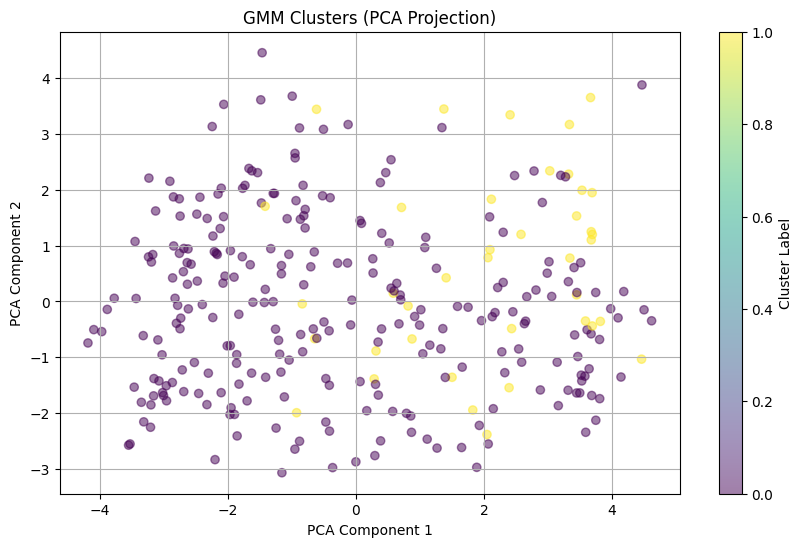

In [81]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('GMM Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

GMM allows for a more nuanced analysis of heart disease risk factors by accounting for overlaps and the possibility of mixed memberships. While the clusters are less distinct compared to K-means, they provide a richer probabilistic framework that might reveal more subtle distinctions in risk profiles. Further exploration of the underlying features of each cluster could help identify which factors are most strongly associated with heart disease risk.

## 6. Evaluation

In [87]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

### K-means Clustering

In [88]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_db_index = davies_bouldin_score(data_scaled, kmeans_labels)

print(f'K-means Silhouette Score: {kmeans_silhouette:.3f}')
print(f'K-means Davies-Bouldin Index: {kmeans_db_index:.3f}')

K-means Silhouette Score: 0.153
K-means Davies-Bouldin Index: 2.335


### Hiererchical Clustering

In [89]:
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
hierarchical_db_index = davies_bouldin_score(data_scaled, hierarchical_labels)

print(f'Hierarchical Silhouette Score: {hierarchical_silhouette:.3f}')
print(f'Hierarchical Davies-Bouldin Index: {hierarchical_db_index:.3f}')

Hierarchical Silhouette Score: 0.145
Hierarchical Davies-Bouldin Index: 2.570


In [90]:
silhouette_avg = silhouette_score(data_scaled, gmm_labels)
print(f'GMM Silhouette Score: {silhouette_avg:.3f}')
db_index = davies_bouldin_score(data_scaled, gmm_labels)
print(f'GMM Davies-Bouldin Index: {db_index:.3f}')


GMM Silhouette Score: 0.174
GMM Davies-Bouldin Index: 2.953


## 7. Summary of Clustering Performance

The clustering methods—K-means, Hierarchical clustering, and Gaussian Mixture Models (GMM)—yielded the following performance metrics:

- K-means Silhouette Score: 0.153, Davies-Bouldin Index: 2.335
- Hierarchical Silhouette Score: 0.145, Davies-Bouldin Index: 2.570
- GMM Silhouette Score: 0.174, Davies-Bouldin Index: 2.953

These scores indicate that all three methods struggle to produce well-defined clusters, as evidenced by low Silhouette Scores and relatively high Davies-Bouldin Index values. Among the three, GMM performed slightly better in terms of cluster separation.

### Insights from Clustering

Despite the clustering performance metrics suggesting limited cluster distinctiveness, K-means and Hierarchical provided valuable information regarding the number of clusters. This information was instrumental in creating a more informative representation of the data using dimensionality reduction techniques such as PCA and t-SNE.

### Dimensionality Reduction Results

When visualizing the data:
- PCA: Offered a simplified view of the data structure, helping to identify potential clusters.
- t-SNE: Showed even better results, effectively capturing the local structures and relationships within the data, leading to clearer visual differentiation of clusters.

While the clustering algorithms indicated overlapping clusters, they nonetheless guided the dimensionality reduction process, resulting in improved data representation. The better performance of t-SNE suggests it is particularly suited for visualizing high-dimensional data, making it a valuable tool in understanding the relationships within the dataset.